Solve heat equation on 2D domain with Periodic boundary conditions. 
Specify an IC, define OpInf problem and attempt a solution. Check retrieved diffusion operator!

In [97]:
import numpy as np
import pandas as pd
import scipy.linalg as la
import scipy.sparse as sparse
import matplotlib.pyplot as plt

import opinf

In [98]:
from phi.flow import *

In [99]:
# create numpy array for velocity

In [100]:
nx = 64
ny = 64

In [101]:
x = np.linspace(0, 1, nx + 1)
y = np.linspace(0, 1, ny + 1)

In [102]:
xm = x[:-1] + (x[1] - x[0]) / 2  # x-Grid (location of cell centers)
ym = y[:-1] + (y[1] - y[0]) / 2  # y-Grid (location of cell centers)

In [103]:
u = np.zeros((nx, ny))
v = np.zeros((nx, ny))
for i in range(nx):
    for j in range(ny):
        # u[i, j] = (10 / 0.2)
        u[i, j] = 1 / 10 - (np.sin(np.pi * x[i])) ** 2 * (
                    np.sin(np.pi * (ym[j] - 0.05)) * np.cos(np.pi * (ym[j] - 0.05)) -
                    np.sin(np.pi * (ym[j] + 0.05)) * np.cos(np.pi * (ym[j] + 0.05)))
for i in range(nx):
    for j in range(ny):
        # v[i, j] = (10 / 0.2)
        v[i, j] = np.sin(np.pi * xm[i]) * np.cos(np.pi * xm[i]) * (
                    (np.sin(np.pi * (y[j] - 0.05))) ** 2 -
                    (np.sin(np.pi * (y[j] + 0.05))) ** 2)

In [104]:
vx = tensor(u, spatial('x,y'))
vy = tensor(v, spatial('x,y'))
velocity = StaggeredGrid(math.stack([vx, vy], channel('vector')), extrapolation.PERIODIC, bounds=Box(x=1, y=1))

In [105]:
velocity

StaggeredGrid[(xˢ=64, yˢ=64, vectorᶜ=2), size=(x=1, y=1) int64, extrapolation=periodic]

<Figure size 1200x500 with 1 Axes>

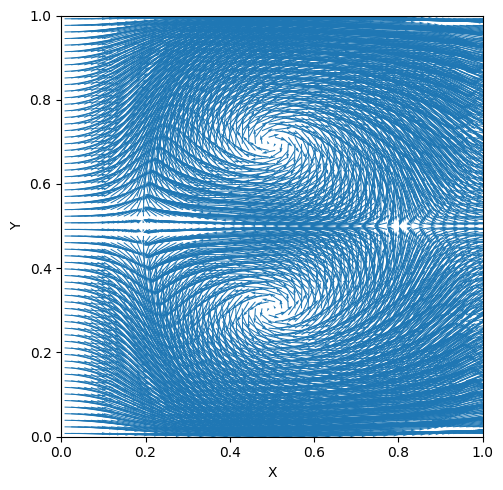

In [111]:
vis.plot(velocity)

In [113]:
omega = np.zeros((nx, ny))
for i in range(nx):
    for j in range(ny):
        omega[i, j] = (np.exp(-((xm[i] - 0.75) ** 2 + (ym[j] - 0.5) ** 2) / (0.05 ** 2)) 
                       - np.exp(-((xm[i] - 0.25) ** 2 + (ym[j] - 0.5) ** 2) / (0.05 ** 2)))

In [ ]:
smoke = CenteredGrid(0, extrapolation.BOUNDARY, x=64, y=64, bounds=Box(x=1, y=1))

In [117]:
smoke_source = CenteredGrid(tensor(omega, spatial('x, y')), extrapolation.BOUNDARY, x=64, y=64, bounds=Box(x=1, y=1))

In [119]:
DT = 0.004

Ref: https://github.com/tum-pbs/PhiFlow/blob/master/demos/heat_equilibrium.py

In [120]:
smoke=smoke + DT * smoke_source

<Figure size 1200x500 with 2 Axes>

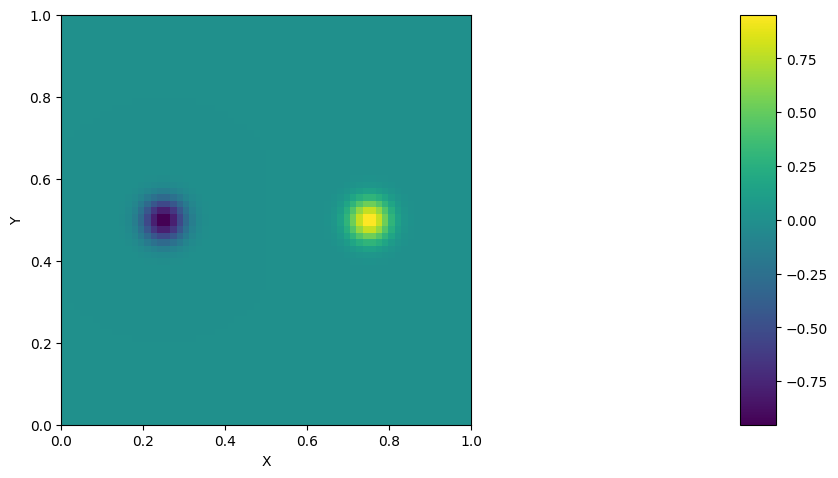

In [149]:
vis.plot(smoke_source)

In [158]:
smoke_final = diffuse.explicit(smoke_source, diffusivity=0.01, dt=DT, substeps=10) + advect.mac_cormack(smoke_source, velocity, dt=DT)

<Figure size 1200x500 with 2 Axes>

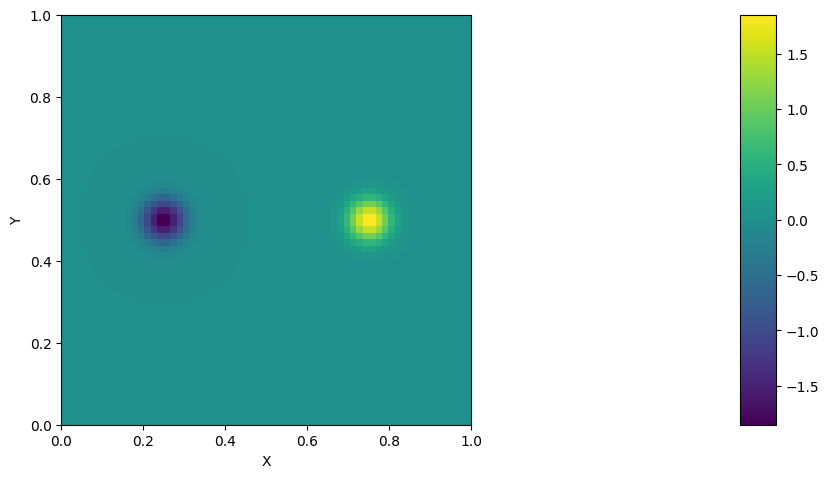

In [159]:
vis.plot(smoke_final)

Vanilla OpInf without regularization

OpInf with $L1$ regularization (our implementation!)